### Problem Statement 1: Samantha has created a dataset named 'top50spotify.csv' of her top 50 songs from spotify.
    

####  Dataset Description:
     top50spotify.csv -The dataset contains 14 features.
     
     Here's a brief description of a few columns in the dataset:
     •SerialNo. -Serial number of songs
     •Track.Name -Name of the track
     •Artist.Name -Name of the artist
     •Genre -Genre of the song
     •Energy -Energy index of the song
     •Length. -Length of the song
     •Popularity -Popularity index of the son

#### Tasks to be performed:

#### 1. Import the dataset as a DataFrame and drop the first column.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv(r"C:\Users\sujee\Downloads\top50spotify.csv",header=0)
data.head(10)

,SerialNo.,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness_dB_,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [3]:
print("NUMBER OF ROWS AND COLUMNS:",data.shape)

NUMBER OF ROWS AND COLUMNS: (50, 14)


In [4]:
new_data=data.drop(["SerialNo."],axis=1)
new_data.head(10)

,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness_dB_,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [5]:
print("NUMBER OF ROWS AND COLUMNS:",new_data.shape)

NUMBER OF ROWS AND COLUMNS: (50, 13)


#### 2. Save it as 'top50.csv'.

In [6]:
new_data.to_csv(r"C:\Users\sujee\OneDrive\PYTHON DSML\top50.csv")

#### 3. Find the average Energy and Length of first 10 songs.

In [7]:
print("Average 'Energy' of first 10 songs:",new_data.Energy.iloc[:10].mean())  #with iloc()

Average 'Energy' of first 10 songs: 65.1


In [8]:
print("Average 'Length' of first 10 songs:",new_data.Length[:10].mean())  #without iloc()

Average 'Length' of first 10 songs: 195.6


##### OR..

In [9]:
avg=new_data[:10]
avg[['Energy','Length']].mean()

Energy     65.1
Length    195.6
dtype: float64

#### 4. Find the total length of songs, group by genre from top to bottom.

In [10]:
print('Total length of songs, grouped by "Genre" from top to bottom:\n\n',new_data.groupby('Genre')['Length'].sum().sort_values(axis=0,ascending=False))

Total length of songs, grouped by "Genre" from top to bottom:

 Genre
dance pop           1621
pop                 1368
latin               1126
edm                  656
reggaeton flow       611
canadian hip hop     579
panamanian pop       514
reggaeton            427
brostep              396
electropop           389
canadian pop         382
dfw rap              333
country rap          272
australian pop       210
atl hip hop          200
boy band             181
escape room          173
big room             164
r&b en espanol       162
pop house            153
trap music           131
Name: Length, dtype: int64


#### 5. Print the artist name with the most number of tracks in one genre. 

In [11]:
famous=new_data.groupby(['Genre','Artist_Name'])['Track_Name'].count().reset_index()
famous.columns=['Genre','Artist_Name','No_of_tracks']
famous[famous.No_of_tracks==max(famous.No_of_tracks)]

,Genre,Artist_Name,No_of_tracks
27,pop,Ed Sheeran,4


##### OR..

In [12]:
keys=['Genre','Artist_Name','No_of_Tracks']
df0=pd.DataFrame(columns=keys)
i=0
for x,y in new_data.groupby(['Genre','Artist_Name']):
    df0.loc[i]=[x[0],x[1],y['Track_Name'].count()]
    i=i+1

df0[df0.No_of_Tracks==df0.No_of_Tracks.max()]

,Genre,Artist_Name,No_of_Tracks
27,pop,Ed Sheeran,4


#### 6. Print the data of the tracks created by the artist from the previous question.

In [13]:
new_data[new_data.Artist_Name=='Ed Sheeran']

,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness_dB_,Liveness,Valence,Length,Acousticness,Speechiness,Popularity
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
37,Antisocial (with Travis Scott),Ed Sheeran,pop,152,82,72,-5,36,91,162,13,5,87
49,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82


##### OR..

In [14]:
print(new_data.groupby('Artist_Name').get_group('Ed Sheeran'))

                                       Track_Name Artist_Name Genre  \
3                 Beautiful People (feat. Khalid)  Ed Sheeran   pop   
5               I Don't Care (with Justin Bieber)  Ed Sheeran   pop   
37                 Antisocial (with Travis Scott)  Ed Sheeran   pop   
49  Cross Me (feat. Chance the Rapper & PnB Rock)  Ed Sheeran   pop   

    Beats_Per_Minute  Energy  Danceability  Loudness_dB_  Liveness  Valence  \
3                 93      65            64            -8         8       55   
5                102      68            80            -5         9       84   
37               152      82            72            -5        36       91   
49                95      79            75            -6         7       61   

    Length  Acousticness  Speechiness  Popularity  
3      198            12           19          86  
5      220             9            4          84  
37     162            13            5          87  
49     206            21           12   

### <hr>

 ### Problem Statement 2
 
Write a Python program to perform the following tasks-





#### 1. Create a pandas series from below dictionary where indices are subjects:

       {'English':{'Sam':60,'Jackson':74,'Ahree':85}, 
       'History':{'Gloria':83,'Sam':65,'Isla':78,'Aron':72,'Gray':61},
       'Geography':{'Jackson':92,'Gloria':95,'Isla':82,'Aron':75,'Ahree':76},
       'Mathematics':{'Sam':99,'Gloria':74,'Jackson':89,'Ahree':85,'Gray':95},
       'Science':{'Sam':89,'Aron':82,'Gray':78,'Isla':93,'Ahree':87}
        }


In [15]:
import pandas as pd
import numpy as np

dict1={'English':{'Sam':60,'Jackson':74,'Ahree':85}, 
       'History':{'Gloria':83,'Sam':65,'Isla':78,'Aron':72,'Gray':61},
       'Geography':{'Jackson':92,'Gloria':95,'Isla':82,'Aron':75,'Ahree':76},
       'Mathematics':{'Sam':99,'Gloria':74,'Jackson':89,'Ahree':85,'Gray':95},
       'Science':{'Sam':89,'Aron':82,'Gray':78,'Isla':93,'Ahree':87}
        }
dict1

{'English': {'Sam': 60, 'Jackson': 74, 'Ahree': 85},
 'History': {'Gloria': 83, 'Sam': 65, 'Isla': 78, 'Aron': 72, 'Gray': 61},
 'Geography': {'Jackson': 92,
  'Gloria': 95,
  'Isla': 82,
  'Aron': 75,
  'Ahree': 76},
 'Mathematics': {'Sam': 99,
  'Gloria': 74,
  'Jackson': 89,
  'Ahree': 85,
  'Gray': 95},
 'Science': {'Sam': 89, 'Aron': 82, 'Gray': 78, 'Isla': 93, 'Ahree': 87}}

In [16]:
ser1=pd.Series(dict1, index=['English','History','Geography','Mathematics','Science'])
ser1

English                  {'Sam': 60, 'Jackson': 74, 'Ahree': 85}
History        {'Gloria': 83, 'Sam': 65, 'Isla': 78, 'Aron': ...
Geography      {'Jackson': 92, 'Gloria': 95, 'Isla': 82, 'Aro...
Mathematics    {'Sam': 99, 'Gloria': 74, 'Jackson': 89, 'Ahre...
Science        {'Sam': 89, 'Aron': 82, 'Gray': 78, 'Isla': 93...
dtype: object

In [17]:
ser1=ser1.apply(pd.Series)
ser1

,Sam,Jackson,Ahree,Gloria,Isla,Aron,Gray
English,60.0,74.0,85.0,NaN,NaN,NaN,NaN
History,65.0,NaN,NaN,83.0,78.0,72.0,61.0
Geography,NaN,92.0,76.0,95.0,82.0,75.0,NaN
Mathematics,99.0,89.0,85.0,74.0,NaN,NaN,95.0
Science,89.0,NaN,87.0,NaN,93.0,82.0,78.0


#### 2. Convert the created series into DataFrame and replace the null values with zeroes.

In [18]:
df1=pd.DataFrame(ser1)
df1

,Sam,Jackson,Ahree,Gloria,Isla,Aron,Gray
English,60.0,74.0,85.0,NaN,NaN,NaN,NaN
History,65.0,NaN,NaN,83.0,78.0,72.0,61.0
Geography,NaN,92.0,76.0,95.0,82.0,75.0,NaN
Mathematics,99.0,89.0,85.0,74.0,NaN,NaN,95.0
Science,89.0,NaN,87.0,NaN,93.0,82.0,78.0


In [19]:
df1=df1.fillna(0)
df1

,Sam,Jackson,Ahree,Gloria,Isla,Aron,Gray
English,60.0,74.0,85.0,0.0,0.0,0.0,0.0
History,65.0,0.0,0.0,83.0,78.0,72.0,61.0
Geography,0.0,92.0,76.0,95.0,82.0,75.0,0.0
Mathematics,99.0,89.0,85.0,74.0,0.0,0.0,95.0
Science,89.0,0.0,87.0,0.0,93.0,82.0,78.0


#### 3. Transpose the DataFrame and create a new column <b>'Average'</b> and fill the values in it by calculating the average of all subjects.

In [20]:
df2=df1.T
df2

,English,History,Geography,Mathematics,Science
Sam,60.0,65.0,0.0,99.0,89.0
Jackson,74.0,0.0,92.0,89.0,0.0
Ahree,85.0,0.0,76.0,85.0,87.0
Gloria,0.0,83.0,95.0,74.0,0.0
Isla,0.0,78.0,82.0,0.0,93.0
Aron,0.0,72.0,75.0,0.0,82.0
Gray,0.0,61.0,0.0,95.0,78.0


In [21]:
df2['Average']=df2.mean(axis=1)
df2

,English,History,Geography,Mathematics,Science,Average
Sam,60.0,65.0,0.0,99.0,89.0,62.6
Jackson,74.0,0.0,92.0,89.0,0.0,51.0
Ahree,85.0,0.0,76.0,85.0,87.0,66.6
Gloria,0.0,83.0,95.0,74.0,0.0,50.4
Isla,0.0,78.0,82.0,0.0,93.0,50.6
Aron,0.0,72.0,75.0,0.0,82.0,45.8
Gray,0.0,61.0,0.0,95.0,78.0,46.8


#### OR.. (for calculating mean!)

In [22]:
df2.iloc[0:1,5]=df2.iloc[0:1,5].mean()
df2

,English,History,Geography,Mathematics,Science,Average
Sam,60.0,65.0,0.0,99.0,89.0,62.6
Jackson,74.0,0.0,92.0,89.0,0.0,51.0
Ahree,85.0,0.0,76.0,85.0,87.0,66.6
Gloria,0.0,83.0,95.0,74.0,0.0,50.4
Isla,0.0,78.0,82.0,0.0,93.0,50.6
Aron,0.0,72.0,75.0,0.0,82.0,45.8
Gray,0.0,61.0,0.0,95.0,78.0,46.8


In [23]:
df2=df2.iloc[:,5:6].mean(axis=1)
print('Hence, average marks of all the subjects of each student:\n\n',df2)

Hence, average marks of all the subjects of each student:

 Sam        62.6
Jackson    51.0
Ahree      66.6
Gloria     50.4
Isla       50.6
Aron       45.8
Gray       46.8
dtype: float64


### <hr>

### Problem Statement 3

#### *Task to be performed:*
Write a Python program to create a series from 1 to 1000 and select only numbers divisible by 7 and 17.

__Output__:
      
        118    119
        237    238
        356    357
        475    476
        594    595
        713    714
        832    833
        951    952
        dtype: int32


In [24]:
import pandas as pd
import numpy as np

ser_a=pd.Series(range(1,1001))
ser_a

0         1
1         2
2         3
3         4
4         5
       ... 
995     996
996     997
997     998
998     999
999    1000
Length: 1000, dtype: int64

In [25]:
ser_a.index

RangeIndex(start=0, stop=1000, step=1)

In [26]:
ser_a.head(10)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
dtype: int64

In [27]:
ser_a.tail(10)

990     991
991     992
992     993
993     994
994     995
995     996
996     997
997     998
998     999
999    1000
dtype: int64

In [28]:
print(ser_a[(ser_a%7==0) & (ser_a%17==0)])

118    119
237    238
356    357
475    476
594    595
713    714
832    833
951    952
dtype: int64


##### OR..

In [29]:
for i in ser_a:
    if i%7==0 and i%17==0:
        print(i)  

119
238
357
476
595
714
833
952


### <hr>

### Problem Statement 4
     Sylphia has a dataset of various cereals sold in the supermarket.
     Syliphia wants to visualize the quality of cereals and determine which manufacturer delivers the best quality.

#### Tasks to be performed:

#### 1. Import the dataset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cer=pd.read_csv('cereal.csv')
cer.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280.0,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320.0,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330.0,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,NaN,25,3,1.0,0.75,34.384843


In [5]:
print('NO. OF ROWS AND COLUMNS:',cer.shape)

NO. OF ROWS AND COLUMNS: (77, 16)


#### 2. Plot ratings of different types of manufacturers.

#### 3. Use xticks range form 0-100.

In [6]:
s1=set(cer.mfr)
s1

{'A', 'G', 'K', 'N', 'P', 'Q', 'R'}

In [7]:
m1=cer.groupby('mfr')['rating'].mean()
m1

mfr
A    54.850917
G    34.485852
K    44.038462
N    67.968567
P    41.705744
Q    42.915990
R    41.542997
Name: rating, dtype: float64

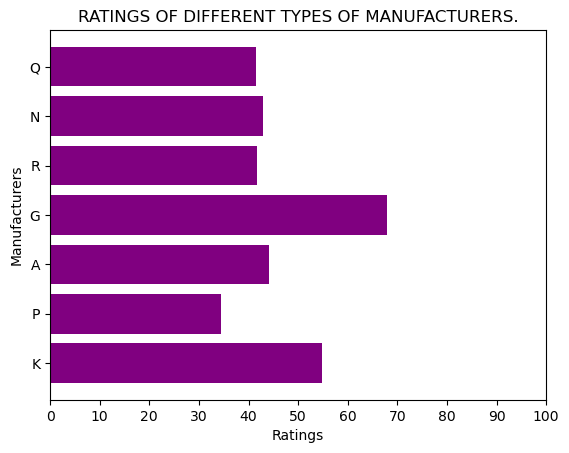

In [8]:
plt.barh(tuple(s1),m1,color='purple')
plt.title('RATINGS OF DIFFERENT TYPES OF MANUFACTURERS.')
plt.xticks(range(0,101,10))
plt.xlabel('Ratings')
plt.ylabel('Manufacturers')
plt.show()

#### 4. Change the style of the graph to seaborn.

C:\Users\sujee\AppData\Local\Temp\ipykernel_8196\1980484230.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


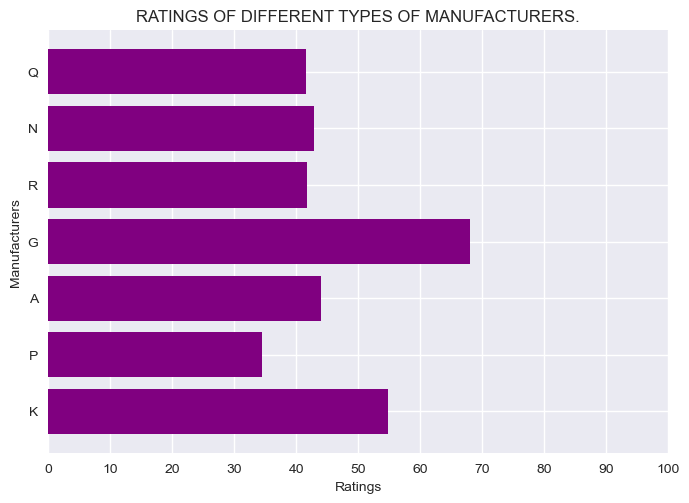

In [9]:
plt.style.use('seaborn')
plt.barh(tuple(s1),m1,color='purple')
plt.title('RATINGS OF DIFFERENT TYPES OF MANUFACTURERS.')
plt.xticks(range(0,101,10))
plt.xlabel('Ratings')
plt.ylabel('Manufacturers')
plt.show()